In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os 
from glob import glob 
from PIL import Image

In [2]:
skin_df = pd.read_csv("HAM10000_metadata.csv")

In [3]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                 for x in glob(os.path.join('C:\\Users\\HP\\Desktop\\FYP_PROJECT\\data','*','*.jpg'))}

In [5]:
skin_df['path'] = skin_df['image_id'].map(image_path.get)

In [6]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [7]:
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [8]:
n_samples = 5

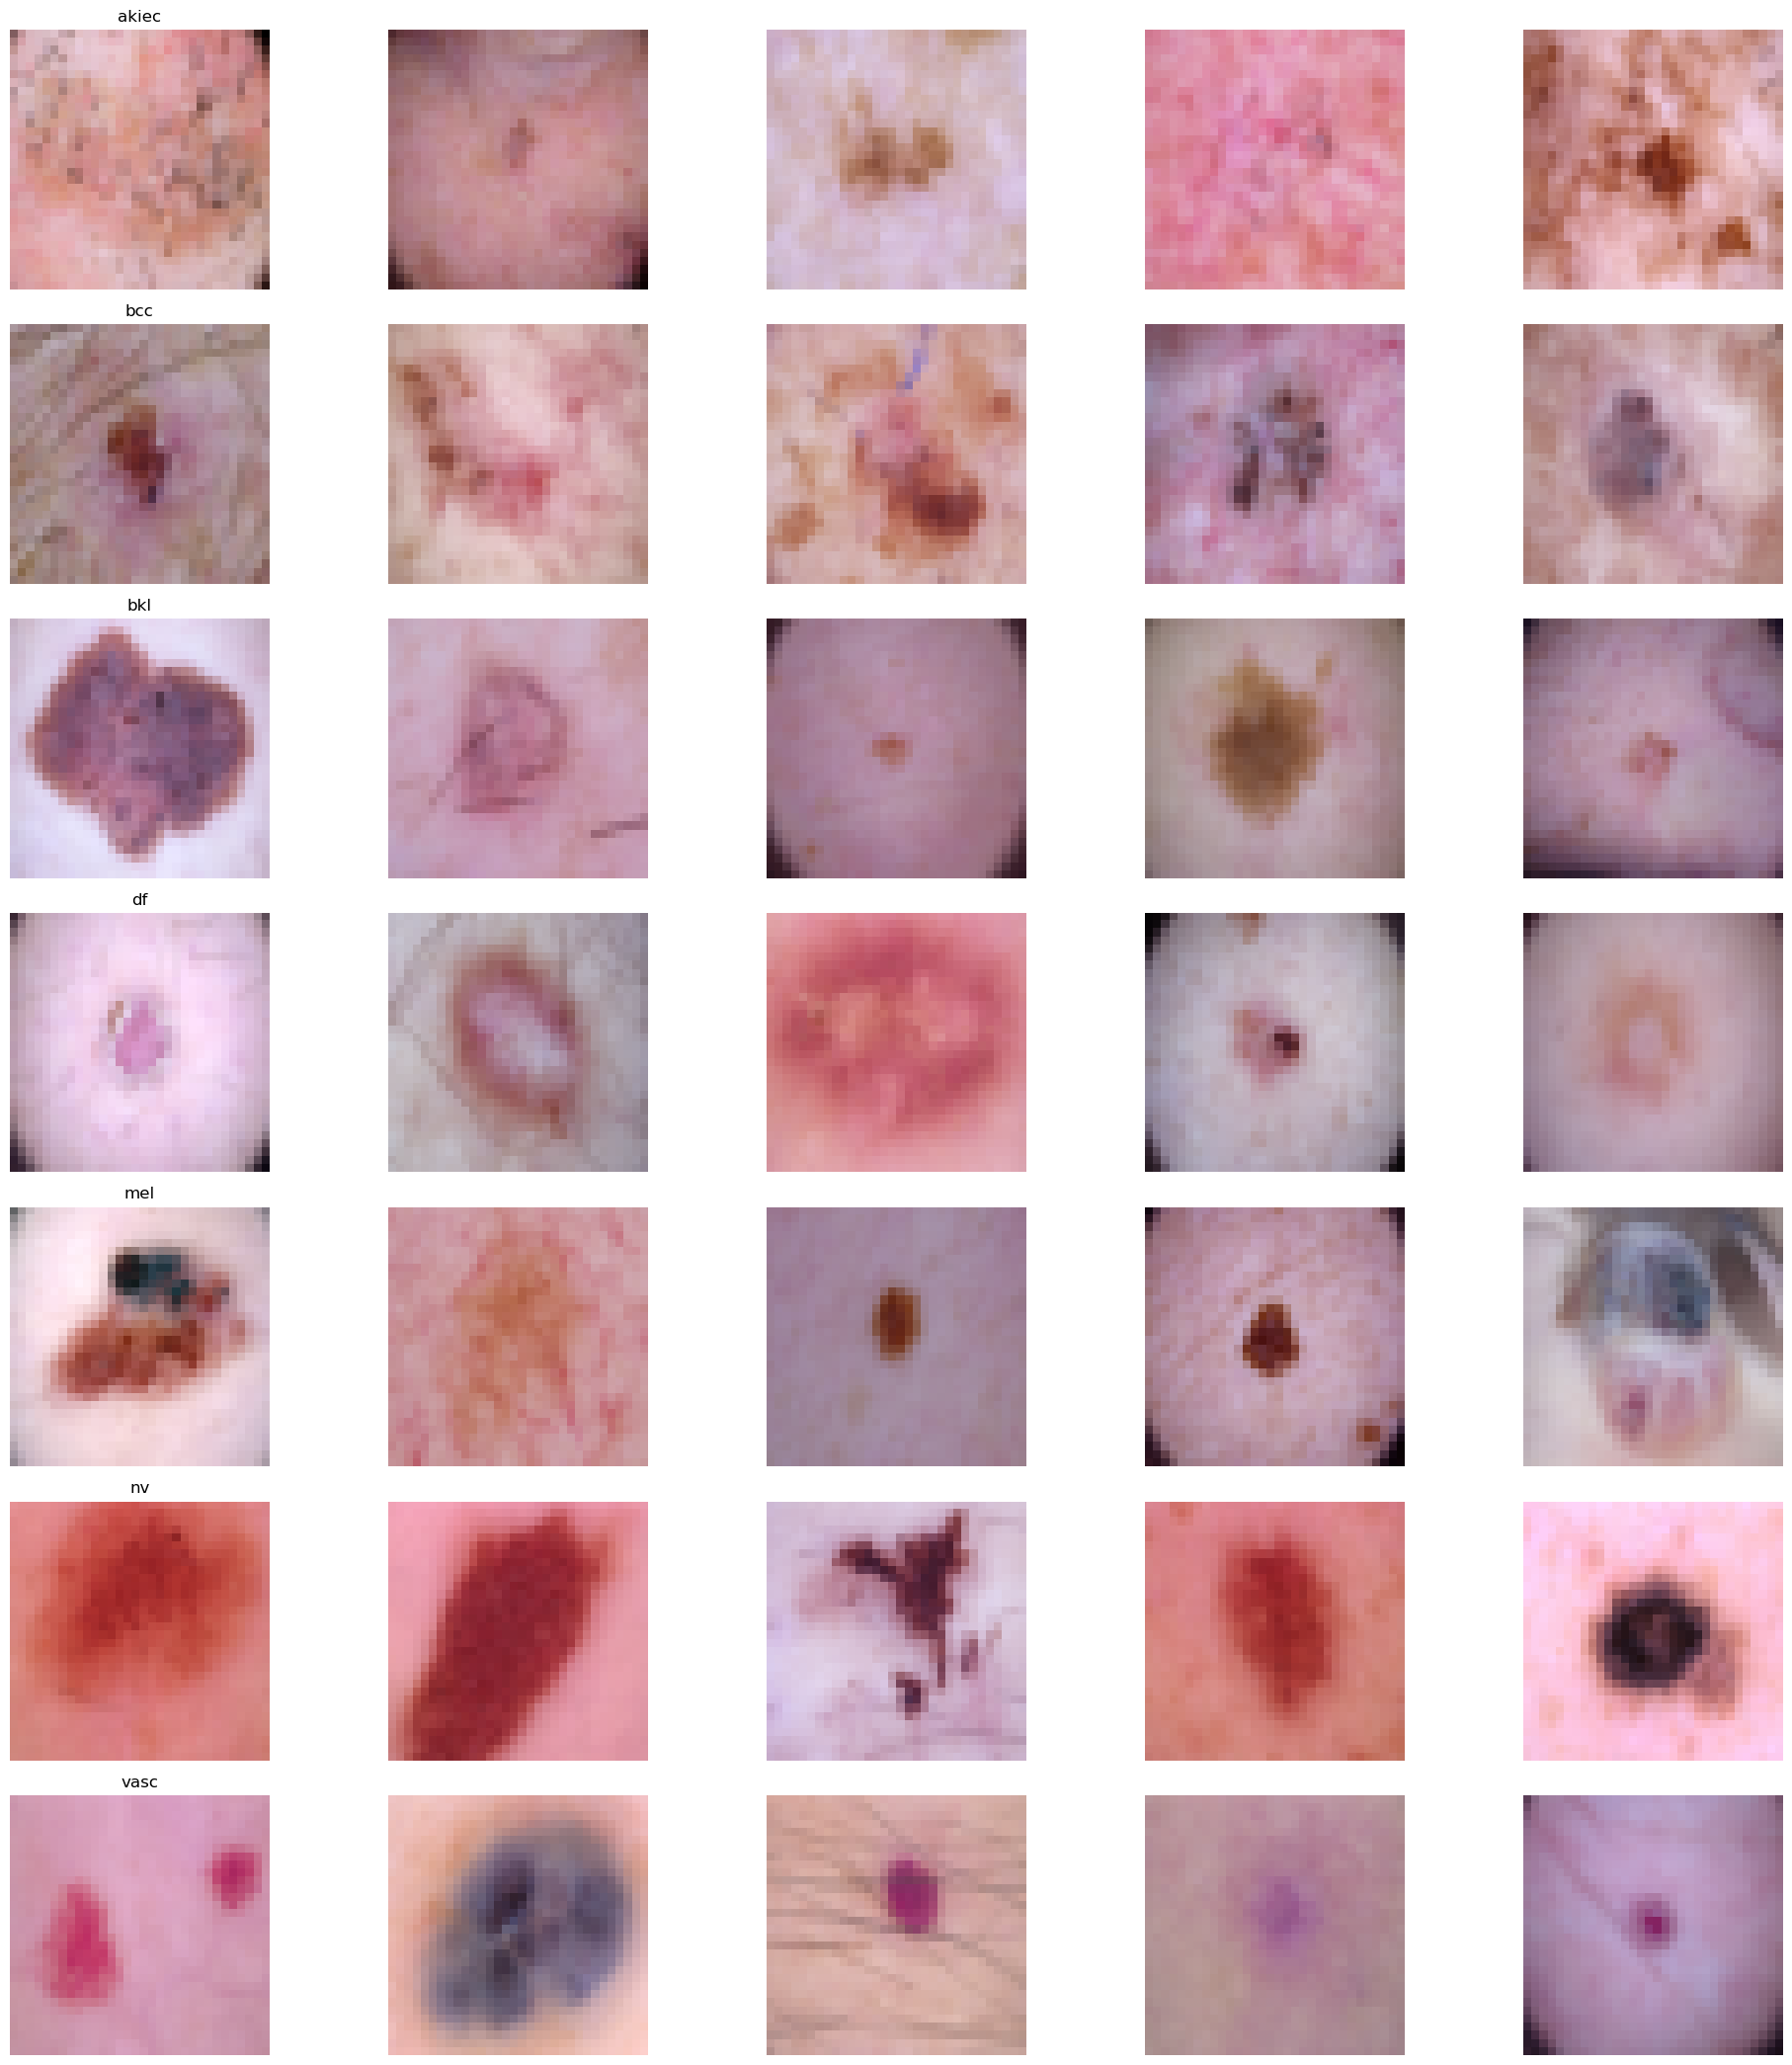

In [9]:
import matplotlib.pyplot as plt

# Correcting the figsize spelling and making the plotting logic clearer
fig, m_axs = plt.subplots(7, n_samples, figsize=(4*n_samples, 3*7))

# Sort DataFrame by 'dx' and group by 'dx'
grouped = skin_df.sort_values(['dx']).groupby('dx')

# Loop over axes and groups
for n_axs, (type_name, type_rows) in zip(m_axs, grouped):
    n_axs[0].set_title(type_name)
    
    # Sample the rows from the type_rows
    sampled_rows = type_rows.sample(n_samples, random_state=42)
    
    # Loop over each sampled row and corresponding axis
    for c_ax, (_, c_row) in zip(n_axs, sampled_rows.iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

plt.tight_layout()  # Ensure spacing between subplots
plt.show()

In [10]:
import pandas as pd 
import os 
import shutil

In [11]:
data_dir = os.getcwd()+"/data/all_images/"

In [12]:
dest_dir = os.getcwd()+"/data/reorganized/"

In [13]:
skin_df2 = pd.read_csv('HAM10000_metadata.csv')

In [14]:
print(skin_df2['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [15]:
label = skin_df2['dx'].unique().tolist()
label_images = []

In [17]:
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/" + id + ".jpg"), (dest_dir + i + "/" + id + ".jpg"))
    label_images=[]

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import matplotlib.pyplot as plt

In [23]:
datagen = ImageDataGenerator()

In [26]:
train_dir = os.getcwd() + "/data/reorganized/"

In [27]:
train_data_keras = datagen.flow_from_directory(
    directory = train_dir,
    class_mode = 'categorical',
    batch_size = 16,
    target_size = (32,32)
)

Found 10015 images belonging to 7 classes.


In [28]:
x,y = next(train_data_keras)

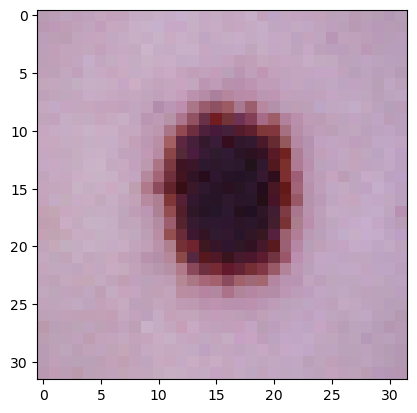

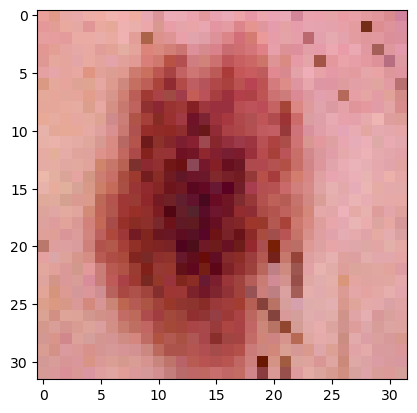

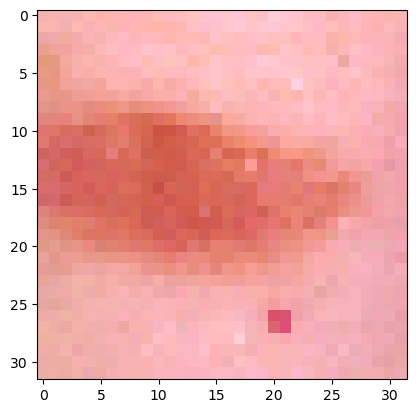

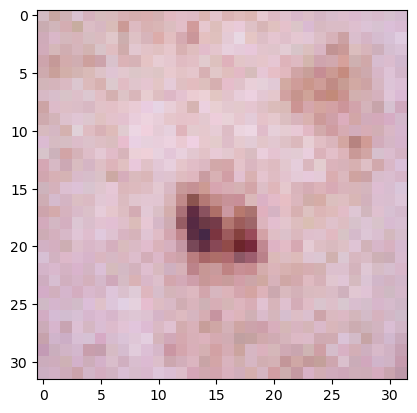

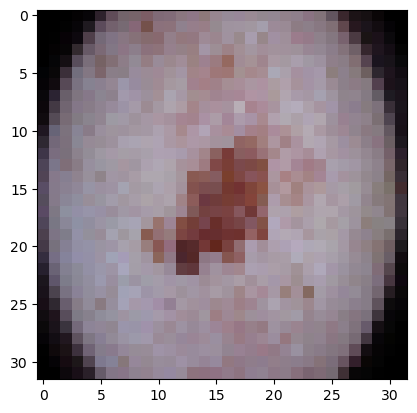

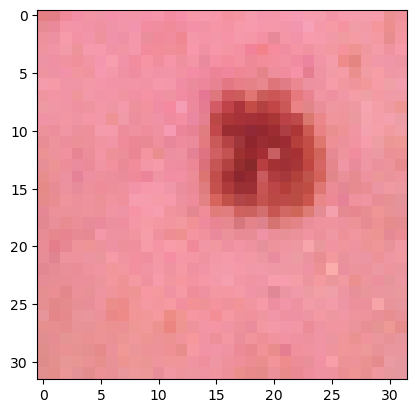

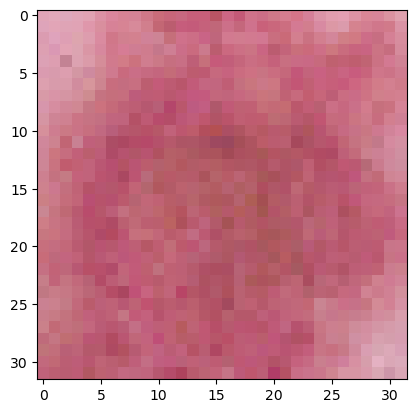

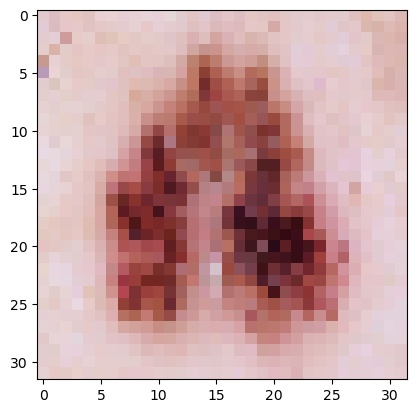

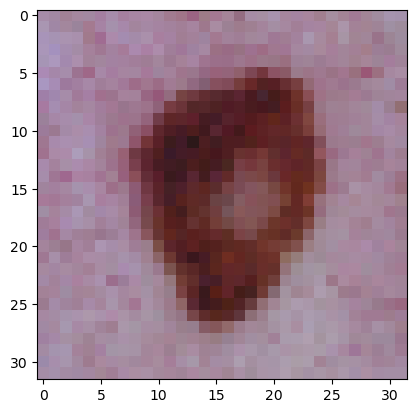

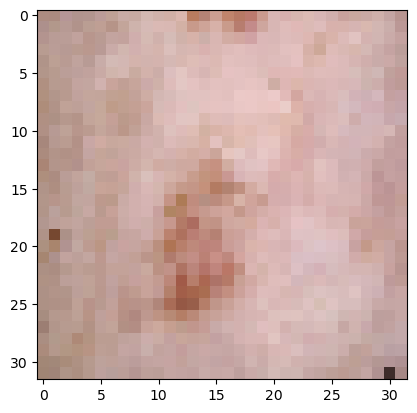

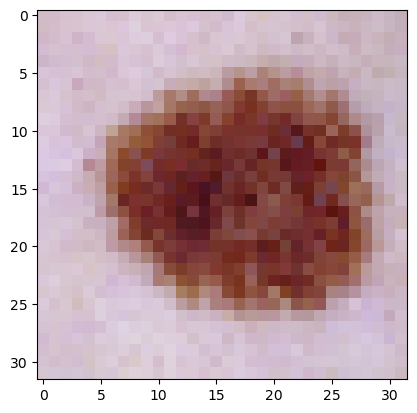

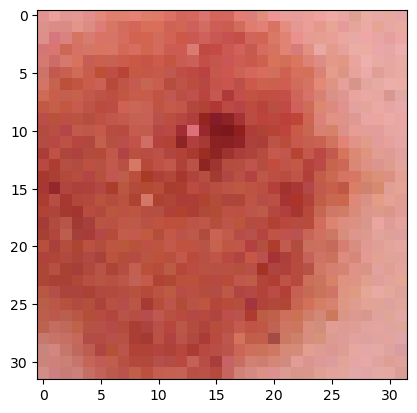

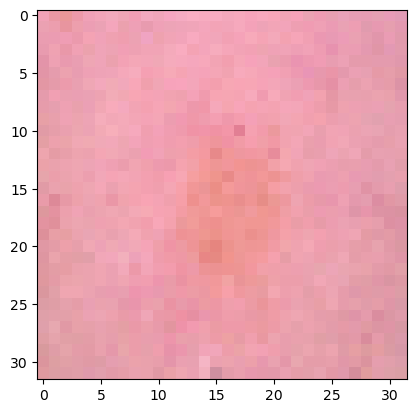

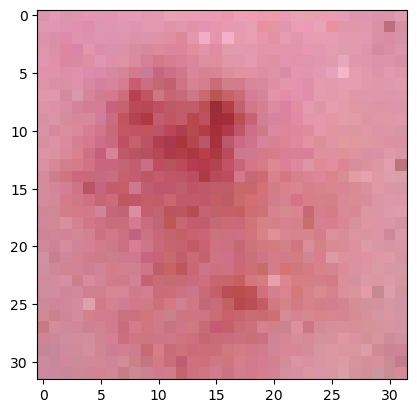

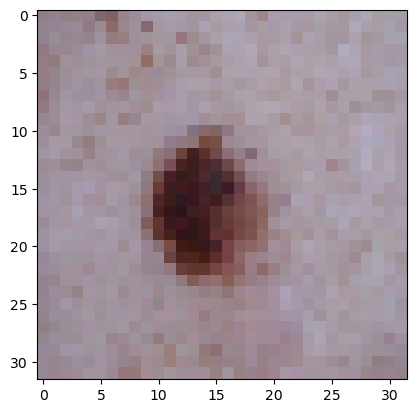

In [29]:
for i in range(0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

In [33]:
import torchvision
from torchvision import transforms
import torch.utils.data as data 
import numpy as np

In [34]:
train_dir = os.getcwd() + "/data/reorganized/"

In [35]:
TRANSFORM_ING = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5],
                         std=[0.5,0.5,0.5])
])

In [36]:
train_data_torch = torchvision.datasets.ImageFolder(root=train_dir)

In [40]:
print("number of train samples:",len(train_data_torch))
print("Deceted classes are:",train_data_torch.class_to_idx)

number of train samples: 10015
Deceted classes are: {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [42]:
labels=np.array(train_data_torch.targets)
(unique,counts)=np.unique(labels,return_counts=True)
frequencies =np.asarray((unique,counts)).T
print(frequencies)

[[   0  327]
 [   1  514]
 [   2 1099]
 [   3  115]
 [   4 1113]
 [   5 6705]
 [   6  142]]


In [45]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import pandas as pd 
import os
from glob import glob 
from PIL import Image

In [46]:
np.random.seed(42)
from sklearn.metrics import confusion_matrix

In [54]:
from tensorflow.keras.utils import to_categorical  # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import autokeras as ak
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization

In [52]:
skin_df = pd.read_csv('HAM10000_metadata.csv')

In [53]:
SIZE=32

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [55]:
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extremity      5  
8984  lower extremity      5  
2310 

C:\Users\HP\AppData\Local\Temp\ipykernel_10896\1848369455.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


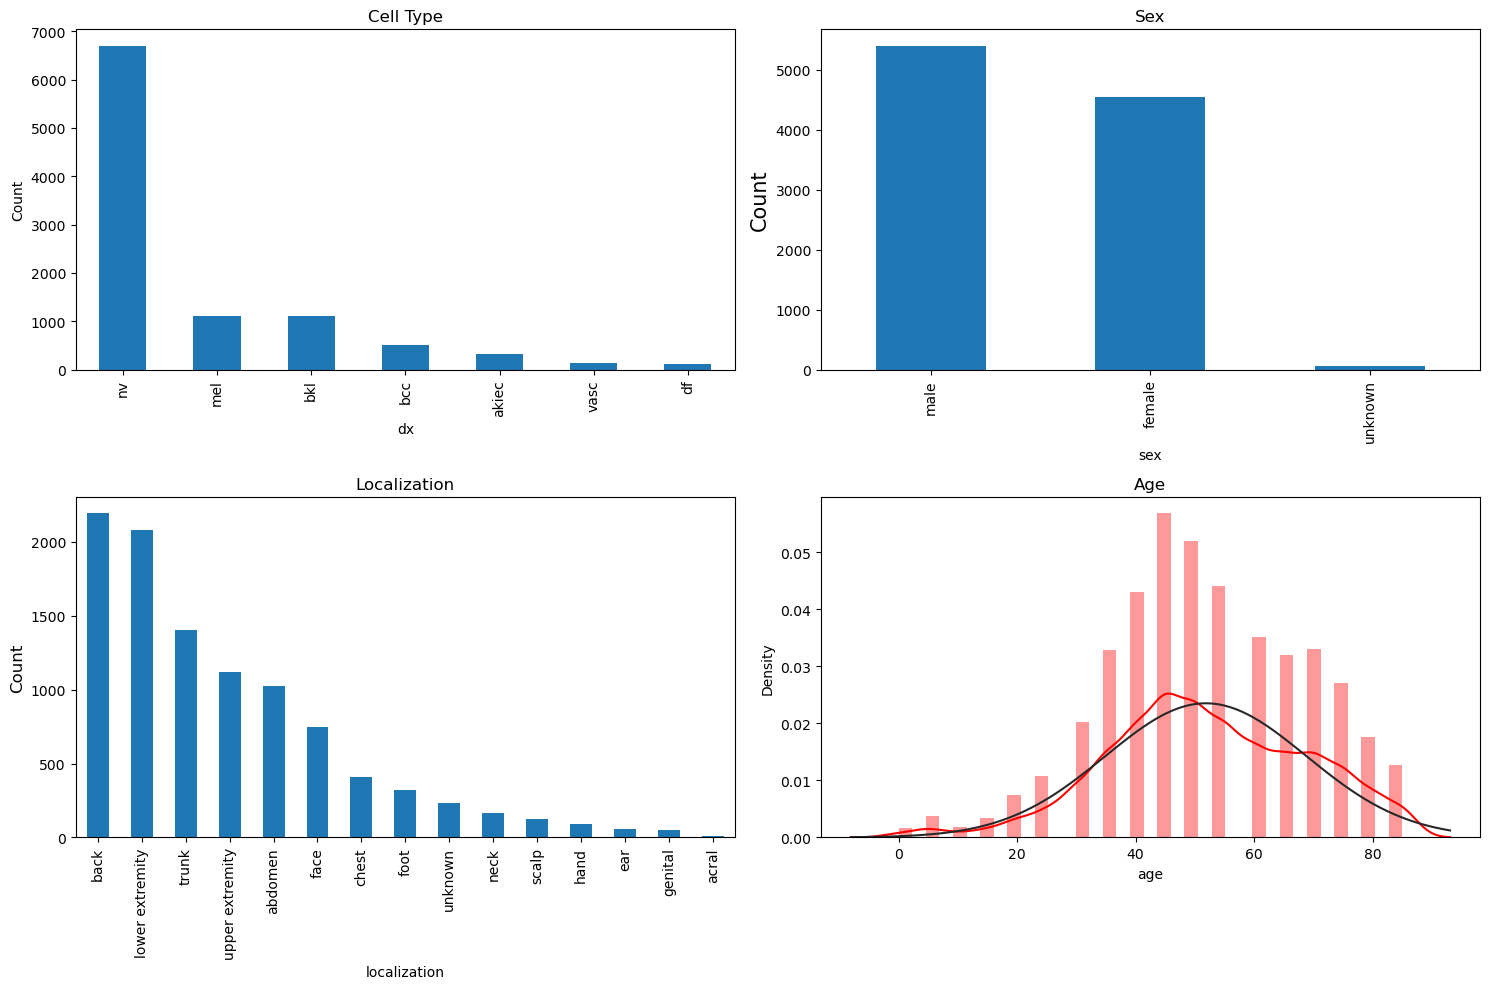

In [56]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [57]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [58]:
#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [59]:
n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [60]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [61]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64


In [63]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('C:\\Users\\HP\\Desktop\\FYP_PROJECT\\data', '*', '*.jpg'))}
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

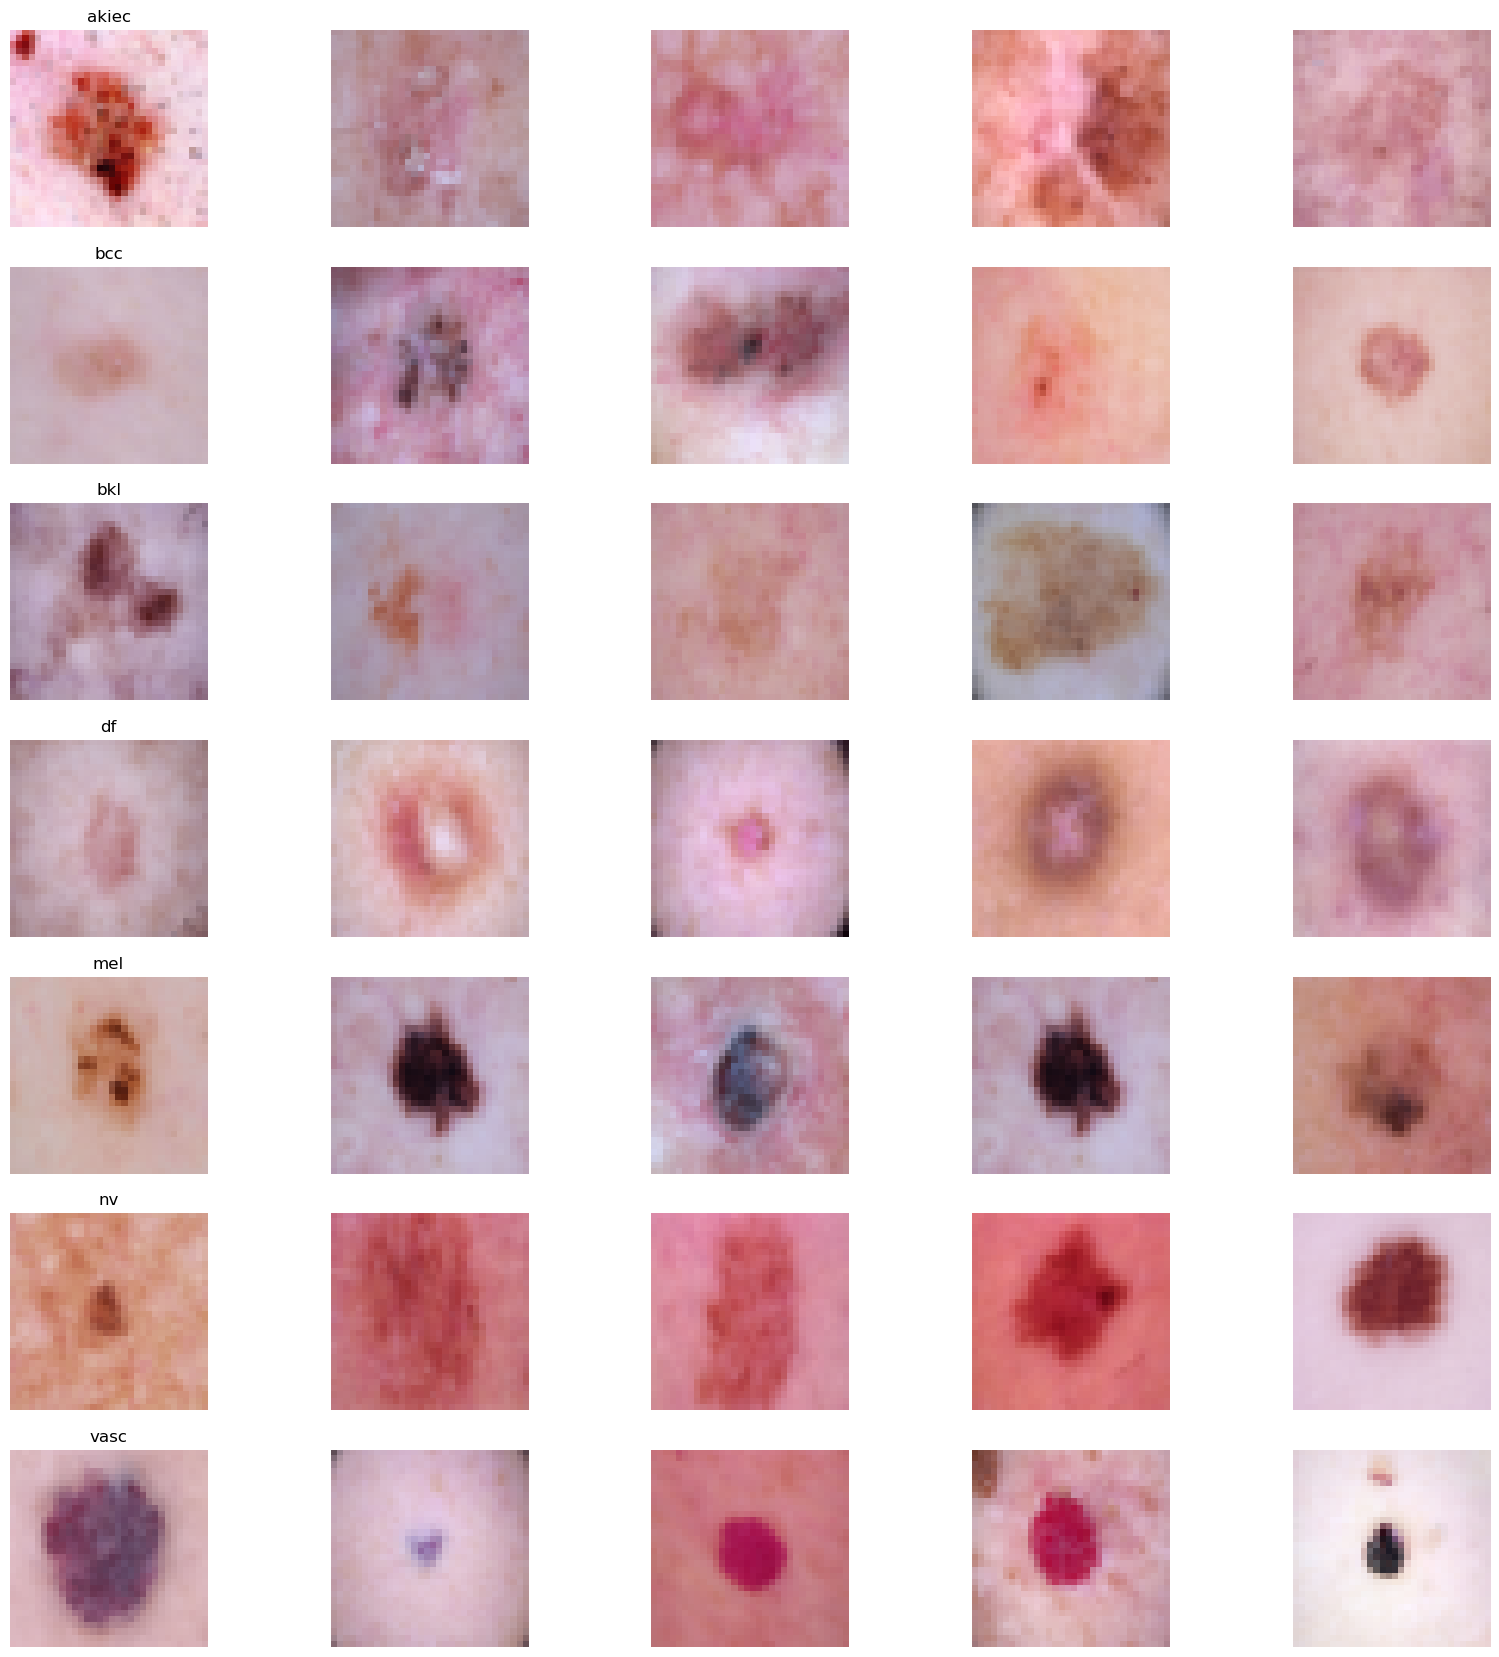

In [64]:
n_samples = 5  

# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [65]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255. # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label'] #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing. Get a very small dataset for training as we will be 
# fitting it to many potential models. 
x_train_auto, x_test_auto, y_train_auto, y_test_auto = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [67]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Input

num_classes = 7

model = Sequential()
model.add(Input(shape=(SIZE, SIZE, 3)))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 384,455 (1.47 MB)

 Trainable params: 384,455 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
batch_size = 16
epochs = 50

history = model.fit(
    x_train_auto, y_train_auto,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_auto, y_test_auto),
    verbose=2
)

Epoch 1/50
165/165 - 11s - 65ms/step - acc: 0.1771 - loss: 1.9232 - val_acc: 0.2251 - val_loss: 1.9204
Epoch 2/50
165/165 - 8s - 50ms/step - acc: 0.2632 - loss: 1.7947 - val_acc: 0.3349 - val_loss: 1.7022
Epoch 3/50
165/165 - 9s - 56ms/step - acc: 0.3543 - loss: 1.5844 - val_acc: 0.3851 - val_loss: 1.5084
Epoch 4/50
165/165 - 10s - 58ms/step - acc: 0.4061 - loss: 1.4525 - val_acc: 0.3771 - val_loss: 1.4380
Epoch 5/50
165/165 - 10s - 64ms/step - acc: 0.4305 - loss: 1.4308 - val_acc: 0.4571 - val_loss: 1.3523
Epoch 6/50
165/165 - 10s - 58ms/step - acc: 0.4564 - loss: 1.3645 - val_acc: 0.4709 - val_loss: 1.3690
Epoch 7/50
165/165 - 10s - 58ms/step - acc: 0.4770 - loss: 1.3384 - val_acc: 0.4834 - val_loss: 1.2950
Epoch 8/50
165/165 - 10s - 58ms/step - acc: 0.4869 - loss: 1.2837 - val_acc: 0.4251 - val_loss: 1.3662
Epoch 9/50
165/165 - 10s - 59ms/step - acc: 0.4945 - loss: 1.2742 - val_acc: 0.4286 - val_loss: 1.3313
Epoch 10/50
165/165 - 10s - 60ms/step - acc: 0.5276 - loss: 1.2231 - val_ac

In [71]:
score = model.evaluate(x_test_auto, y_test_auto)
print('Test accuracy:', score[1])

# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.7024 - loss: 0.8287
Test accuracy: 0.7097142934799194


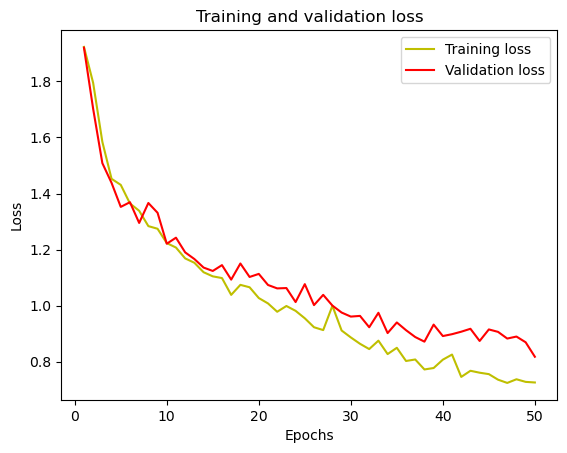

In [72]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
# Prediction on test data
y_pred = model.predict(x_test_auto)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test data to one hot vectors
y_true = np.argmax(y_test_auto, axis=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [75]:
# Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

<Axes: >

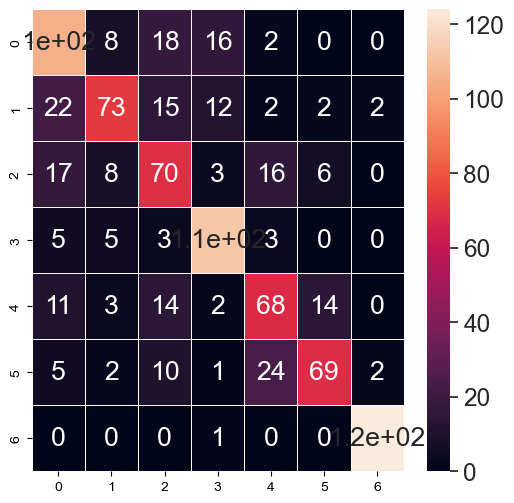

In [76]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

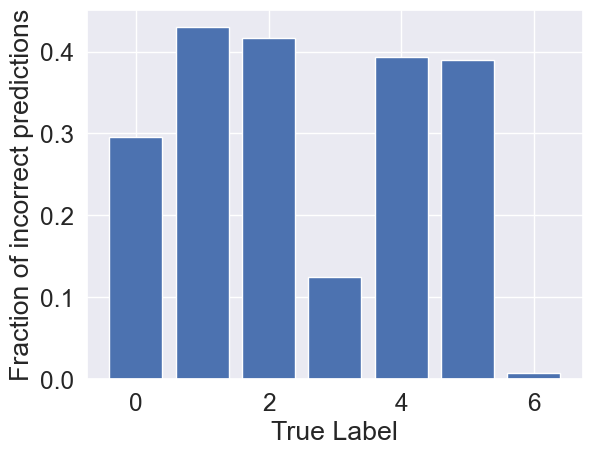

In [77]:
# Plot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [78]:
model.save('skin_cancer_classification.h5')  # Saves in HDF5 format